In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.datasets import load_digits

In [5]:
digit = load_digits()

In [11]:
digit.data.shape
# digit.target.shape

(1797, 64)

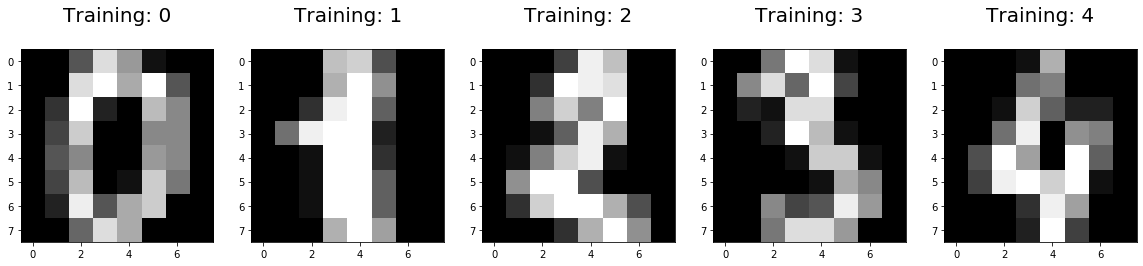

In [13]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digit.data[0:5], digit.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n'% label, fontsize=20)